# Imports


In [1]:
from basketball_reference_scraper.players import get_stats, get_game_logs, get_player_headshot
from basketball_reference_scraper.teams import get_roster, get_team_stats, get_opp_stats, get_roster_stats, get_team_misc
from basketball_reference_scraper.pbp import get_pbp
from basketball_reference_scraper.shot_charts import get_shot_chart
from basketball_reference_scraper.box_scores import get_box_scores
from basketball_reference_scraper.seasons import get_schedule, get_standings
from basketball_reference_scraper.utils import get_player_suffix, RetriableRequest
from basketball_reference_scraper.lookup import lookup
from basketball_reference_scraper.constants import CATEGORY_COLUMNS, CATEGORIES, TEAM_CATEGORIES
import pandas as pd
import time
import os

import unicodedata, unidecode
YEAR_TEAM_ROSTER = {}


# TESTING

# DATA RETRIEVAL

In [15]:
yearRange= [2023,2023] # YEARS DONE: 2000-2003, 1004 ATL

# Player Data

In [27]:
# FETCH TEAM ROSTERS + TEAM DATA
team_dfs = {
    "per_game": pd.DataFrame(),
    "totals" : pd.DataFrame(),
    "per_minute" : pd.DataFrame(),
    "per_poss" : pd.DataFrame(),
    "advanced" : pd.DataFrame(),
    "adj_shooting" : pd.DataFrame(),
    "shooting" : pd.DataFrame()
}


for year in range(yearRange[0],yearRange[1]+1):
    teams=  None
    print(year)
    stat_df = get_team_stats(season_end_year=year)
    teams = list(stat_df['per_game']['TEAM'])
    for category in TEAM_CATEGORIES:
        team_dfs[category] = pd.concat([team_dfs[category], stat_df[category]])
    TEAM_ROSTER = {}
    for team in teams:
        ROSTER = get_roster(team,year)
        ROSTER['PLAYER'].apply(lambda x: x.replace('(TW)', '').strip())
        TEAM_ROSTER[team] = ROSTER[['PLAYER','BIRTH_DATE']]
    YEAR_TEAM_ROSTER[year] = TEAM_ROSTER

2022
Request # 2 @ 3:23:30
REQUEST!
Request # 3 @ 3:23:33
REQUEST!
Request # 4 @ 3:23:33
REQUEST!
Request # 5 @ 3:23:34
REQUEST!
Request # 6 @ 3:23:36
REQUEST!
Request # 7 @ 3:23:37
REQUEST!
Request # 8 @ 3:23:38
REQUEST!
Request # 9 @ 3:23:39
REQUEST!
Request # 10 @ 3:23:42
REQUEST!
Request # 11 @ 3:23:43
REQUEST!
Request # 12 @ 3:23:45
REQUEST!
Request # 13 @ 3:23:46
REQUEST!
Request limit reached. Waiting a minute...
Request # 0 @ 3:23:47
REQUEST!
Request # 0 @ 3:24:48
REQUEST!
Request # 1 @ 3:24:49
REQUEST!
Request # 2 @ 3:24:51
REQUEST!
Request # 3 @ 3:24:53
REQUEST!
Request # 4 @ 3:24:54
REQUEST!
Request # 5 @ 3:24:55
REQUEST!
Request # 6 @ 3:24:57
REQUEST!
Request # 7 @ 3:24:58
REQUEST!
Request # 8 @ 3:25:0
REQUEST!
Request # 9 @ 3:25:2
REQUEST!
Request # 10 @ 3:25:4
REQUEST!
Request # 11 @ 3:25:5


REQUEST!
Request # 12 @ 3:25:6
REQUEST!
Request # 13 @ 3:25:8


In [ ]:
# WRITE TEAM DATA

directory = "team_data"
if not os.path.exists(directory):
    os.makedirs(directory)
for key in TEAM_CATEGORIES:
    print(key)

    team_dfs[key].to_csv(os.path.join(directory, f'team_{key}.csv'), index=False)

totals


NameError: name 'team_dfs' is not defined

In [ ]:
# WRITE ROSTER DATA

import os

# ...
directory = "roster_data"
if not os.path.exists(directory):
        os.makedirs(directory)

for year in YEAR_TEAM_ROSTER:
    newDirectory = os.path.join(directory, str(year))
    if not os.path.exists(newDirectory):
        os.makedirs(newDirectory)
    for team in YEAR_TEAM_ROSTER[year]:
        file_path = os.path.join(newDirectory, f'{team}.txt')
        """with open(file_path, 'w', encoding='utf-8') as file:
            for item in YEAR_TEAM_ROSTER[year][team]:
                file.write(f'{item['PLAYER']},{item['BIRTH_DATE']}\n')"""
        YEAR_TEAM_ROSTER[year][team].to_csv(file_path, index=False)


In [3]:
# RETRIEVE YEAR_TEAM_ROSTER DATA FROM FILES
base_directory = 'roster_data'
ROSTER = []
# Iterate over each year directory
for year in os.listdir(base_directory):

    year_int = int(year)  # Convert year to integer

    YEAR_TEAM_ROSTER[year_int] = {}  # Use the integer year as the key

    year_path = os.path.join(base_directory, year)
    # Iterate over each team.txt file in the year directory
    for team_path in os.listdir(year_path):
            
        # Construct the full file path
        file_path = os.path.join(year_path, team_path)
        team = team_path[:-4]
        # Perform operations on the file
        # For example, read the file contents
        """with open(file_path, 'r', encoding='utf-8') as file:
            contents = file.read().splitlines()
            contents = [line.split(',') for line in contents]
        YEAR_TEAM_ROSTER[year_int][team] = [(line[0].replace('(TW)', '').strip(),line[1]) for line in contents]"""
        YEAR_TEAM_ROSTER[year_int][team] = pd.read_csv(file_path)
        YEAR_TEAM_ROSTER[year_int][team]['PLAYER'] = YEAR_TEAM_ROSTER[year_int][team]['PLAYER'].apply(lambda x: x.replace(' (TW)',''))
        
        ROSTER += list(YEAR_TEAM_ROSTER[year_int][team]['PLAYER'])


            

In [4]:
# RETRIEVE br_names.txt
file_path = 'C:\Users\chris\Downloads\NBA Project-20230615T185747Z-001\NBA Project\basketball_reference_scraper\br_names.txt'
with open(file_path,"r") as file:
    content = file.read()
    ROSTER_FILE = content.split('\n')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1980150006.py, line 2)

In [ ]:
# update Bbr_names.txt

import os
import unidecode
import unicodedata

file_path = 'C:/Users/chris/Downloads/NBA Project-20230615T185747Z-001/NBA Project/basketball_reference_scraper/br_names.txt'

# Create a set to store the existing content for faster lookup
existing_content = set()

# Read existing content into the set
if os.path.exists(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            existing_content.add(line.strip())

# Append new player names to the file
with open(file_path, 'a') as file:
    for player in ROSTER:
        player_name = unidecode.unidecode(unicodedata.normalize('NFD', player).encode('ascii', 'ignore').decode("utf-8"))
        player_name = player_name.replace(' (TW)',"")
        if player_name not in existing_content:
            file.write(player_name + '\n')
            existing_content.add(player_name)


In [ ]:
# delete string in file
import fileinput

def delete_string_in_file(file_path, target_string):
    # Read the file content and replace the target string
    with fileinput.FileInput(file_path, inplace=True) as file:
        for line in file:
            modified_line = line.replace(target_string, "")
            print(modified_line, end="")


delete_string_in_file(file_path, " Jr.")

In [9]:
# Create and update visited player set from player_data
VisitedPlayer = set()
# RETRIEVE YEAR_TEAM_ROSTER DATA FROM FILES
base_directory = 'player_data'

# Iterate over each year directory

# 2000 special case

# Convert year to integer
year_path = os.path.join(base_directory, "2000")
# Iterate over each team.txt file in the year directory
# Construct the full file path
file_path = os.path.join(year_path,os.listdir(year_path)[0])

players = pd.read_csv(file_path)
for player in players['PLAYER']:
    VisitedPlayer.add(player)


for year in os.listdir(base_directory)[1:]:

    year_int = int(year)  # Convert year to integer
    year_path = os.path.join(base_directory, year)
    # Iterate over each team.txt file in the year directory
    for team_path in os.listdir(year_path):
            
        # Construct the full file path
        file_path = os.path.join(year_path, team_path)
        files = os.listdir(file_path)
        if files:
            print(year_path,team_path)
            file_path = os.path.join(file_path,os.listdir(file_path)[0])
            with open(file_path, "r", encoding="utf-8") as file:
                content = file.read()
            if len(content) > 1:
                players = pd.read_csv(file_path)
                for player in players['PLAYER']:
                    VisitedPlayer.add(player)  


player_data\2001 ATL
player_data\2001 BOS
player_data\2001 CHI
player_data\2001 CHO
player_data\2001 CLE
player_data\2001 DAL
player_data\2001 DEN
player_data\2001 DET
player_data\2001 GSW
player_data\2001 HOU
player_data\2001 IND
player_data\2001 LAC
player_data\2001 LAL
player_data\2001 MIA
player_data\2001 MIL
player_data\2001 MIN
player_data\2001 NJN
player_data\2001 NYK
player_data\2001 ORL
player_data\2001 PHI
player_data\2001 PHO
player_data\2001 POR
player_data\2001 SAC
player_data\2001 SAS
player_data\2001 SEA
player_data\2001 TOR
player_data\2001 UTA
player_data\2001 VAN
player_data\2001 WAS
player_data\2002 ATL
player_data\2002 BOS
player_data\2002 CHI
player_data\2002 CHO
player_data\2002 CLE
player_data\2002 DAL
player_data\2002 DEN
player_data\2002 DET
player_data\2002 GSW
player_data\2002 HOU
player_data\2002 IND
player_data\2002 LAC
player_data\2002 LAL
player_data\2002 MEM
player_data\2002 MIA
player_data\2002 MIL
player_data\2002 MIN
player_data\2002 NJN
player_data\2

In [13]:
# DONT RUN THIS
# Open the file in write mode with UTF-8 encoding and write evrything in visited player to players.txt
with open('players.txt', 'w', encoding='utf-8') as file:
    # Iterate over the list and write each element on a new line
    for player in VisitedPlayer:
        file.write(player + '\n')

In [2]:
def concat_df_dic(dic1,dic2):
    newDic = {}

    for category in dic1:
        newDic[category] = pd.concat([dic1[category],dic2[category]])
    return newDic

In [3]:
# Fetch game_logs
# write game_logs folder, all game logs will be in here.
folder_name = 'game_logs'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
batch_number = 150

# Open the file in read mode with UTF-8 encoding
with open('players.txt', 'r', encoding='utf-8') as file:
    # Read the file contents into a list
    lines = file.readlines()

# Remove the newline character from each line and store it in a new list
VisitedPlayer = [line.strip() for line in lines]
for i in range((batch_number-1)*15, len(VisitedPlayer), 15):
    file_name = f'{folder_name}/batch{batch_number}'
    player_batch = VisitedPlayer[i:i+15]
    print('batch #',batch_number)
    # Process player names and create dictionaries
    player_data = {
        "game_logs": pd.DataFrame(),
        "advanced_game_logs": pd.DataFrame(),
        "playoff_game_logs": pd.DataFrame()
    } 
    for i,player_name in enumerate(player_batch):
        print('Player #',i+1)
        game_logs = get_game_logs(player_name)
        for category in game_logs:
            game_logs[category]['PLAYER'] = player_name
        player_data = concat_df_dic(player_data,game_logs)
    for category in player_data:
        player_data[category].to_csv(file_name+'_'+category+'.txt', index=False)
    batch_number+=1

    print(f'File "{file_name}" created.')

batch # 150
Player # 1
You searched for "Etdrick Bohannon"
1 result found.
Etdrick Bohannon
Results for Etdrick Bohannon:

Etdrick Bohannon
Initializing HTTPS Session

Request # 0 @ 0:2:32
getting big batch
Request # 1 @ 0:2:33
{'2000-01', '1999-00', '1997-98', '1998-99'}
Request # 2 @ 0:2:34
Request # 3 @ 0:2:36
Request # 4 @ 0:2:37
Request # 5 @ 0:2:38
Request # 6 @ 0:2:39
Request # 7 @ 0:2:41
Request # 8 @ 0:2:41
Request # 9 @ 0:2:42
Player # 2
You searched for "Perry Jones"
24 results found.
Perry Jones
Request # 10 @ 0:2:43
getting big batch
Request # 11 @ 0:2:44
{'2012-13', '2013-14', '2014-15'}
Request # 12 @ 0:2:46
Request # 13 @ 0:2:47
Request limit reached. Waiting a minute...
Request # 0 @ 0:2:48
Request # 0 @ 0:3:50
Request # 1 @ 0:3:51
Request # 2 @ 0:3:53
Player # 3
You searched for "Reece Gaines"
1 result found.
Reece Gaines
Results for Reece Gaines:

Reece Gaines
Request # 3 @ 0:3:55
getting big batch
Request # 4 @ 0:3:55
{'2004-05', '2003-04', '2005-06'}
Request # 5 @ 

In [18]:
# player_data retrieval
player_dfs = {
    "per_game": pd.DataFrame(),
    "totals": pd.DataFrame(),
    "per_minute": pd.DataFrame(),
    "per_poss": pd.DataFrame(),
    "advanced": pd.DataFrame(),
    "adj_shooting": pd.DataFrame(),
    "shooting": pd.DataFrame(),
    "game_logs": pd.DataFrame()
}

found_last_team = False
directory = "player_data"
for year in range(yearRange[0], yearRange[1]+1):
    print(year)
    TEAMS = YEAR_TEAM_ROSTER[year]
    
    newDirectory = os.path.join(directory, str(year))
    if not os.path.exists(newDirectory):
        os.makedirs(newDirectory)
    for team in TEAMS:
        print(team)
        teamDirectory = os.path.join(newDirectory, team)
        if not os.path.exists(teamDirectory):
            os.makedirs(teamDirectory)
        # --------------------- just for 2001 tor and on
        if team == 'PHO':
           found_last_team = True
        #found_last_team = True
        if found_last_team:
        # --------------------
            ROSTER = YEAR_TEAM_ROSTER[year][team]
            current_team_dfs = {
                "per_game": pd.DataFrame(),
                "totals": pd.DataFrame(),
                "per_minute": pd.DataFrame(),
                "per_poss": pd.DataFrame(),
                "advanced": pd.DataFrame(),
                "adj_shooting": pd.DataFrame(),
                "shooting": pd.DataFrame(),
                "game_logs": pd.DataFrame()
            }
            for index, row in ROSTER.iterrows():
                player = row['PLAYER']
                if player not in VisitedPlayer:
                    birthdate = row['BIRTH_DATE']
                    print(player)

                    suffix = get_player_suffix(
                        lookup(player, True), birthdate)[:-5]
                    """for category in CATEGORIES:
                        print(category)
                        df = get_stats(category,suffix = suffix)
                        df['PLAYER'] = player
                        player_dfs[category] = pd.concat([player_dfs[category],df])"""
                    # retrieve all stats
                    current_player_dfs = get_stats(suffix=suffix)
                    game_logs = get_game_logs(suffix=suffix, year=year)
                    current_player_dfs["game_logs"] = game_logs if not game_logs is None else pd.DataFrame()
                    for key in current_player_dfs:
                        current_player_dfs[key]['PLAYER'] = player

                    # store all stats
                    current_team_dfs = concat_df_dic(current_team_dfs,current_player_dfs)
            file_path = os.path.join(teamDirectory)
            for category in current_team_dfs:
                current_file_path = os.path.join(file_path, f'{category}.csv')
                current_team_dfs[category].to_csv(current_file_path, index=False)
                print(current_file_path)
            player_dfs = concat_df_dic(player_dfs,current_team_dfs)   


2023
ATL
BOS
BRK
CHI
CHO
CLE
DAL
DEN
DET
GSW
HOU
IND
LAC
LAL
MEM
MIA
MIL
MIN
NOP
NYK
OKC
ORL
PHI
PHO
Jock Landale
You searched for "Jock Landale"
1 result found.
Jock Landale
Results for Jock Landale:

https://www.basketball-reference.com/players/l/landajo01.html
Request # 1 @ 5:9:16
REQUEST!
Request # 2 @ 5:9:17
REQUEST!
Request # 3 @ 5:9:19
REQUEST!
https://www.basketball-reference.com//players/l/landajo01/gamelog/2023
Ish Wainright
You searched for "Ish Wainright"
1 result found.
Ish Wainright
Results for Ish Wainright:

https://www.basketball-reference.com/players/w/wainris01.html
Request # 4 @ 5:9:20
REQUEST!
Request # 5 @ 5:9:22
REQUEST!
Request # 6 @ 5:9:23
REQUEST!
https://www.basketball-reference.com//players/w/wainris01/gamelog/2023
player_data\2023\PHO\per_game.csv
player_data\2023\PHO\totals.csv
player_data\2023\PHO\per_minute.csv
player_data\2023\PHO\per_poss.csv
player_data\2023\PHO\advanced.csv
player_data\2023\PHO\adj_shooting.csv
player_data\2023\PHO\shooting.csv
playe

In [ ]:
# Deprecated - write stuff from year_team_roster to player_data, this is now done during retrieval
directory = "player_data"
if not os.path.exists(directory):
        os.makedirs(directory)

for year in YEAR_TEAM_ROSTER:
    newDirectory = os.path.join(directory, str(year))
    if not os.path.exists(newDirectory):
        os.makedirs(newDirectory)
    for team in YEAR_TEAM_ROSTER[year]:
        file_path = os.path.join(newDirectory, f'{team}.txt')
        """with open(file_path, 'w', encoding='utf-8') as file:
            for item in YEAR_TEAM_ROSTER[year][team]:
                file.write(f'{item['PLAYER']},{item['BIRTH_DATE']}\n')"""
        YEAR_TEAM_ROSTER[year][team].to_csv(file_path, index=False)

In [25]:
# retrieve team_data
team_dfs = {
    "per_game": pd.DataFrame(),
    "totals" : pd.DataFrame(),
    "per_minute" : pd.DataFrame(),
    "per_poss" : pd.DataFrame(),
    "advanced" : pd.DataFrame(),
    "adj_shooting" : pd.DataFrame(),
    "shooting" : pd.DataFrame()
}

for category in team_dfs:
    team_dfs[category] = pd.read_csv(f'team_data/team_{category}.csv')

In [ ]:
new_columns = ['SEASON', 'AGE', 'TEAM', 'LEAGUE', 'POS', 'G', 'MP', 'FG', 'LGFG', '2P', 'LG2P', '3P', 'LG3P',
               'eFG%', 'LGeFG%', 'FT', 'LGFT', 'TS', 'LGTS', 'FTr', 'LGFTr', '3PAr', 'LG3PAr',
               'FG+','2P+','3P+','eFG+','FT+','TS+','FTr+','3PAr+','FG Add','TS Add','PLAYER']


In [26]:
# change column names for adj_shooting
new_columns = ['SEASON', 'AGE', 'TEAM', 'LEAGUE', 'POS', 'G', 'MP', 'FG', 'LGFG', '2P', 'LG2P', '3P', 'LG3P',
               'eFG%', 'LGeFG%', 'FT', 'LGFT', 'TS', 'LGTS', 'FTr', 'LGFTr', '3PAr', 'LG3PAr',
               'FG+','2P+','3P+','eFG+','FT+','TS+','FTr+','3PAr+','FG Add','TS Add','PLAYER']

# Define the base directory path
base_dir = 'player_data'
year_dir = os.path.join(base_dir, str(2000))
# Find the adj_shooting.csv file in the team folder
file_path = os.path.join(year_dir, 'adj_shooting.csv')

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df[[col for col in df.columns if '.2' not in col and '.3' not in col]]
# Rename the columns
df.columns = new_columns
"SEASON,AGE,TEAM,LEAGUE,POS,G,MP,FG,FG,2P,2P,3P,3P,eFG%,eFG%,FT,FT,TS,TS,FTr,FTr,3PAr,3PAr,FG,FG,2P,2P,3P,3P,eFG%,eFG%,FT,FT,TS,TS,FTr,FTr,3PAr,3PAr,FG+,2P+,3P+,eFG+,FT+,TS+,FTr+,3PAr+,FG Add,TS Add,PLAYER"
"SEASON,AGE,TEAM,LEAGUE,POS,G,MP,FG,FG,2P,2P,3P,3P,eFG%,eFG%,FT,FT,TS,TS,FTr,FTr,3PAr,3PAr,FG,FG,2P,2P,3P,3P,eFG%,eFG%,FT,FT,TS,TS,FTr,FTr,3PAr,3PAr,FG+,2P+,3P+,eFG+,FT+,TS+,FTr+,3PAr+,FG Add,TS Add,PLAYER"
# Save the modified DataFrame back to the same CSV file
df.to_csv(file_path, index=False)



# Iterate through each year folder
for year in range(2001, 2024):
    year_dir = os.path.join(base_dir, str(year))

    # Iterate through each team folder
    for team_name in os.listdir(year_dir):
        print(team_name)
        team_dir = os.path.join(year_dir, team_name)

        # Find the adj_shooting.csv file in the team folder
        file_path = os.path.join(team_dir, 'adj_shooting.csv')
        print(file_path)
        # Read the CSV file into a DataFrame
        if os.path.getsize(file_path) >5:
            df = pd.read_csv(file_path)
            df = df[[col for col in df.columns if '.2' not in col and '.3' not in col]]
            # Rename the columns
            df.columns = new_columns

            # Save the modified DataFrame back to the same CSV file
            df.to_csv(file_path, index=False)

ATL
player_data\2001\ATL\adj_shooting.csv
BOS
player_data\2001\BOS\adj_shooting.csv
CHI
player_data\2001\CHI\adj_shooting.csv
CHO
player_data\2001\CHO\adj_shooting.csv
CLE
player_data\2001\CLE\adj_shooting.csv
DAL
player_data\2001\DAL\adj_shooting.csv
DEN
player_data\2001\DEN\adj_shooting.csv
DET
player_data\2001\DET\adj_shooting.csv
GSW
player_data\2001\GSW\adj_shooting.csv
HOU
player_data\2001\HOU\adj_shooting.csv
IND
player_data\2001\IND\adj_shooting.csv
LAC
player_data\2001\LAC\adj_shooting.csv
LAL
player_data\2001\LAL\adj_shooting.csv
MIA
player_data\2001\MIA\adj_shooting.csv
MIL
player_data\2001\MIL\adj_shooting.csv
MIN
player_data\2001\MIN\adj_shooting.csv
NJN
player_data\2001\NJN\adj_shooting.csv
NYK
player_data\2001\NYK\adj_shooting.csv
ORL
player_data\2001\ORL\adj_shooting.csv
PHI
player_data\2001\PHI\adj_shooting.csv
PHO
player_data\2001\PHO\adj_shooting.csv
POR
player_data\2001\POR\adj_shooting.csv
SAC
player_data\2001\SAC\adj_shooting.csv
SAS
player_data\2001\SAS\adj_shoot

In [36]:
# read player_dfs from their year folders
base_dir = 'player_data'
year_dir = os.path.join(base_dir, str(2000))
# Find the adj_shooting.csv file in the team folder


player_dfs = {
    "per_game": pd.DataFrame(),
    "totals": pd.DataFrame(),
    "per_minute": pd.DataFrame(),
    "per_poss": pd.DataFrame(),
    "advanced": pd.DataFrame(),
    "adj_shooting": pd.DataFrame(),
    "shooting": pd.DataFrame(),
    "game_logs": pd.DataFrame()
}

# Read the CSV file into a DataFrame
for category in player_dfs:
    file_path = os.path.join(year_dir,f'{category}.csv')
    player_dfs[category] = pd.concat([player_dfs[category] ,pd.read_csv(file_path)])


# Iterate through each year folder
for year in range(2001, 2024):
    year_dir = os.path.join(base_dir, str(year))

    # Iterate through each team folder
    for team_name in os.listdir(year_dir):
        print(team_name)
        team_dir = os.path.join(year_dir, team_name)
        
        # Find the adj_shooting.csv file in the team folder
        for category in player_dfs:
            file_path = os.path.join(team_dir,f'{category}.csv')
            if os.path.getsize(file_path) >5:
                
                player_dfs[category] = pd.concat([player_dfs[category],pd.read_csv(file_path)])


player_data\2000\per_game.csv
player_data\2000\totals.csv
player_data\2000\per_minute.csv
player_data\2000\per_poss.csv
player_data\2000\advanced.csv
player_data\2000\adj_shooting.csv
player_data\2000\shooting.csv
player_data\2000\game_logs.csv
ATL
BOS
CHI
CHO
CLE
DAL
DEN
DET
GSW
HOU
IND
LAC
LAL
MIA
MIL
MIN
NJN
NYK
ORL
PHI
PHO
POR
SAC
SAS
SEA
TOR
UTA
VAN
WAS
ATL
BOS
CHI
CHO
CLE
DAL
DEN
DET
GSW
HOU
IND
LAC
LAL
MEM
MIA
MIL
MIN
NJN
NYK
ORL
PHI
PHO
POR
SAC
SAS
SEA
TOR
UTA
WAS
ATL
BOS
CHI
CLE
DAL
DEN
DET
GSW
HOU
IND
LAC
LAL
MEM
MIA
MIL
MIN
NJN
NOH
NYK
ORL
PHI
PHO
POR
SAC
SAS
SEA
TOR
UTA
WAS
ATL
BOS
CHI
CLE
DAL
DEN
DET
GSW
HOU
IND
LAC
LAL
MEM
MIA
MIL
MIN
NJN
NOH
NYK
ORL
PHI
PHO
POR
SAC
SAS
SEA
TOR
UTA
WAS
ATL
BOS
CHA
CHI
CLE
DAL
DEN
DET
GSW
HOU
IND
LAC
LAL
MEM
MIA
MIL
MIN
NJN
NOH
NYK
ORL
PHI
PHO
POR
SAC
SAS
SEA
TOR
UTA
WAS
ATL
BOS
CHA
CHI
CLE
DAL
DEN
DET
GSW
HOU
IND
LAC
LAL
MEM
MIA
MIL
MIN
NJN
NOK
NYK
ORL
PHI
PHO
POR
SAC
SAS
SEA
TOR
UTA
WAS
ATL
BOS
CHA
CHI
CLE
DAL
DEN
DET
GSW
HOU
IND
LAC
LAL

In [39]:
# Write player_data into concerted files
base_dir = 'player_data'
for category in player_dfs:
    file_path = os.path.join(base_dir,f'{category}.csv')
    player_dfs[category]= player_dfs[category].drop_duplicates()
    player_dfs[category].to_csv(file_path, index=False)


In [24]:
# read player_data from concerted files
player_dfs = {
    "per_game": pd.DataFrame(),
    "totals": pd.DataFrame(),
    "per_minute": pd.DataFrame(),
    "per_poss": pd.DataFrame(),
    "advanced": pd.DataFrame(),
    "adj_shooting": pd.DataFrame(),
    "shooting": pd.DataFrame(),
    "game_logs": pd.DataFrame()
}

base_dir = 'player_data'
# Read the CSV file into a DataFrame
for category in player_dfs:
    file_path = os.path.join(base_dir,f'{category}.csv')
    player_dfs[category] = pd.read_csv(file_path)

C:\Users\chris\AppData\Local\Temp\ipykernel_21172\499171285.py:17: DtypeWarning: Columns (6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  player_dfs[category] = pd.read_csv(file_path)


In [33]:
# read game_logs
game_logs_dfs = {
    "game_logs": pd.DataFrame(),
    "advanced": pd.DataFrame(),
    "playoffs":pd.DataFrame()
}
base_dir = 'game_logs'
for filename in os.listdir(base_dir):
    file_path = os.path.join(base_dir,filename)
    if 'advanced' in filename:
        game_logs_dfs['advanced'] = pd.concat([game_logs_dfs['advanced'],pd.read_csv(file_path)])
    elif 'playoff' in filename:
        game_logs_dfs['playoffs'] = pd.concat([game_logs_dfs['playoffs'],pd.read_csv(file_path)])
    else:
        game_logs_dfs['game_logs'] = pd.concat([game_logs_dfs['game_logs'],pd.read_csv(file_path)])


# Exploratory Data Analysis


C:\Users\chris\AppData\Local\Temp\ipykernel_21172\3404329575.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  player_dfs['shooting'].groupby('SEASON',as_index=False).mean().plot(x='SEASON',y='# Dunks',marker='o', linestyle='-')


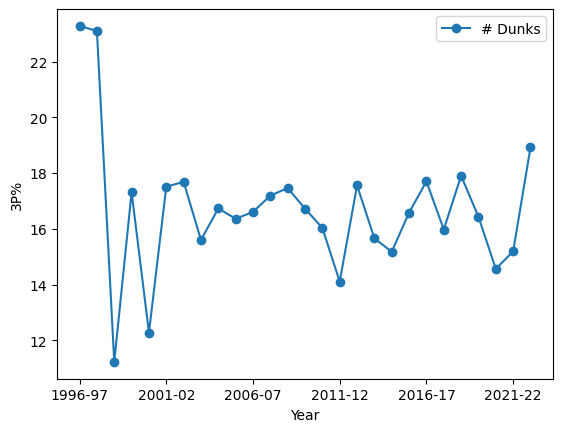

In [22]:
import matplotlib.pyplot as plt
player_dfs['shooting'].groupby('SEASON',as_index=False).mean().plot(x='SEASON',y='# Dunks',marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Dunks')
# Display the plot
plt.show()

C:\Users\chris\AppData\Local\Temp\ipykernel_21172\2056056842.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  player_dfs['shooting'].groupby('SEASON',as_index=False).mean().plot(x='SEASON',y=[col for col in player_dfs['shooting'].columns if '% of FGA' in col and col !='% of FGA 2P'],marker='o', linestyle='-')


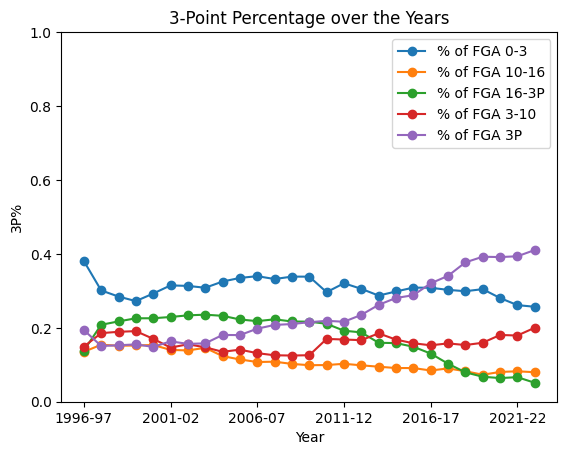

In [23]:
import matplotlib.pyplot as plt
player_dfs['shooting'].groupby('SEASON',as_index=False).mean().plot(x='SEASON',y=[col for col in player_dfs['shooting'].columns if '% of FGA' in col and col !='% of FGA 2P'],marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('3P%')
plt.title('3-Point Percentage over the Years')
plt.ylim(0, 1)
# Display the plot
plt.show()

# Pre processing

Let's try to normalize everything before hand. 

In [ ]:
# convert age: year - days -> year
game_logs_dfs['game_logs']['AGE'] = game_logs_dfs['game_logs']['AGE'].apply(lambda x: int(x[:2]) + float(int(x.split('-')[1])/365))


In [51]:
# refactor RESULT into WON and diff
import re
game_logs_dfs['game_logs']['DIFF'] = game_logs_dfs['game_logs']['RESULT'].apply(lambda text: float(re.search(r'\((.*?)\)', text).group(1)))
game_logs_dfs['game_logs']['WON'] = game_logs_dfs['game_logs']['RESULT'].apply(lambda x: 1 if x[0] =='W' else 0 )
# refactor home into hot encode
game_logs_dfs['game_logs']['HOME']= game_logs_dfs['game_logs']['HOME/AWAY'].apply(lambda x: 1 if x=='HOME' else 0 )

# drop unneeded columns
game_logs_dfs['game_logs'].drop(['RESULT','HOME/AWAY'],axis = 1, inplace = True)

# get rid of NANs
game_logs_dfs['game_logs'].fillna(0,inplace=True)


In [ ]:
# convert columns to float values
float_columns = ['GS','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS','GAME_SCORE','+/-']
for column in float_columns:
    game_logs_dfs['game_logs'][column] = pd.to_numeric(game_logs_dfs['game_logs'][column], errors='coerce')


In [63]:

game_logs_dfs['game_logs']['DATE'] = pd.to_datetime(game_logs_dfs['game_logs']['DATE'])

In [64]:
game_logs_dfs['game_logs']

,DATE,AGE,TEAM,OPPONENT,GS,MP,FG,FGA,FG%,3P,...,BLK,TOV,PF,PTS,GAME_SCORE,+/-,PLAYER,DIFF,WON,HOME
0,2006-11-24,23.528767,DEN,GSW,0.0,3:05,0.0,0.0,0.000,0.0,...,0.0,1.0,1.0,0.0,-0.4,-5.0,JaKarr Sampson,11.0,1,1
1,2006-12-02,23.550685,DEN,IND,0.0,2:22,1.0,1.0,1.000,0.0,...,0.0,0.0,0.0,3.0,2.3,-3.0,JaKarr Sampson,20.0,1,1
2,2006-12-08,23.567123,DEN,MIA,0.0,1:37,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,-2.0,JaKarr Sampson,16.0,1,1
3,2006-12-13,23.580822,DEN,WAS,0.0,4:29,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.7,-4.0,JaKarr Sampson,-29.0,0,0
4,2006-12-26,23.616438,DEN,BOS,0.0,1:04,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.3,-1.0,JaKarr Sampson,11.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,2019-04-02,21.238356,ATL,SAS,0.0,18:19,2.0,9.0,0.222,0.0,...,0.0,0.0,2.0,4.0,1.0,1.0,Isaac Humphries,-6.0,0,0
3714,2019-04-03,21.241096,ATL,PHI,0.0,4:59,0.0,2.0,0.000,0.0,...,0.0,0.0,1.0,0.0,-1.8,-3.0,Isaac Humphries,8.0,1,1
3715,2019-04-05,21.246575,ATL,ORL,0.0,14:37,1.0,3.0,0.333,1.0,...,0.0,0.0,1.0,3.0,1.2,1.0,Isaac Humphries,-36.0,0,0
3716,2019-04-07,21.252055,ATL,MIL,1.0,17:10,2.0,6.0,0.333,2.0,...,0.0,0.0,2.0,6.0,3.4,-19.0,Isaac Humphries,-8.0,0,0


# Model Creation

input : 
    player: 
        previous gamelogs
        adjusted shooting stats
        advanced shooting
        per_game stats (time series?)
        per_poss stats
        shooting stats
    team: adjusted shooting stats, advanced shooting, per_game stats (time series?), per_poss stats, shooting stats
    opposing team: adjusted shooting stats, advanced shooting, per_game stats (time series?), per_poss stats, shooting stats
output : individual player performance -> counting stats (essentially gamelog)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import ConvLSTM2D
